<a href="https://colab.research.google.com/github/ajonyemercy4-ai/eigenvalues/blob/main/statistical_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive

In [3]:
df = pd.read_csv("Car_Sales.csv")

In [4]:
df.head()

,Car_ID,Make,Model,Year,Price ($),Mileage (km),Fuel Type,Transmission,Owner History,Sold (Yes/No)
0,1001,Mazda,Mazda3,2013,32935.2,105354,Petrol,Manual,First Owner,No
1,1002,Kia,Sorento,2015,23799.4,94113,Petrol,Automatic,Second Owner,No
2,1003,Ford,Focus,2023,21786.0,91180000,Diesel,Manual,First Owner,No
3,1004,Mazda,CX-5,2023,36836.8,40731,Diesel,Automatic,First Owner,Yes
4,1005,Mazda,CX-5,2016,34722.6,68542,Electric,Manual,Third Owner,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         233 non-null    int64  
 1   Make           233 non-null    object 
 2   Model          233 non-null    object 
 3   Year           233 non-null    int64  
 4   Price ($)      229 non-null    float64
 5   Mileage (km)   233 non-null    int64  
 6   Fuel Type      233 non-null    object 
 7   Transmission   233 non-null    object 
 8   Owner History  233 non-null    object 
 9   Sold (Yes/No)  233 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 18.3+ KB


In [6]:
import seaborn as sns

In [7]:
from scipy import stats
from scipy.stats import pearsonr

In [8]:
df.describe()

,Car_ID,Year,Price ($),Mileage (km)
count,233.000000,233.000000,229.000000,2.330000e+02
mean,1090.888412,2016.077253,30521.466376,7.437440e+06
std,59.432557,4.076113,10498.002380,9.253987e+07
min,1001.000000,2010.000000,5627.400000,1.165300e+04
25%,1037.000000,2013.000000,23070.400000,6.525400e+04
50%,1086.000000,2016.000000,29077.000000,9.935500e+04
75%,1142.000000,2019.000000,37615.400000,1.314040e+05
max,1200.000000,2023.000000,55887.400000,1.399859e+09


In [10]:
df.shape

(233, 10)

In [14]:
# group by year to get total sales per year
yearly_sales = df.groupby('Year')['Price ($)'].sum().reset_index()

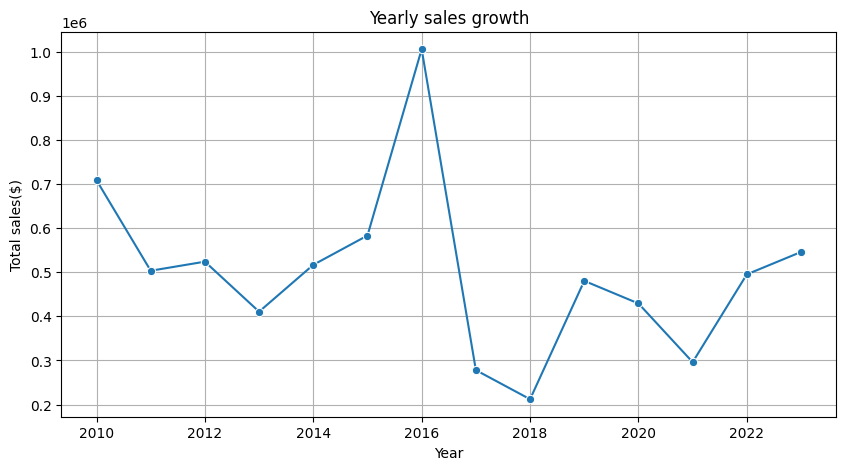

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x  = yearly_sales["Year"],y = yearly_sales["Price ($)"],marker="o")
plt.title("Yearly sales growth")
plt.xlabel("Year")
plt.ylabel("Total sales($)")
plt.grid(True)
plt.show()

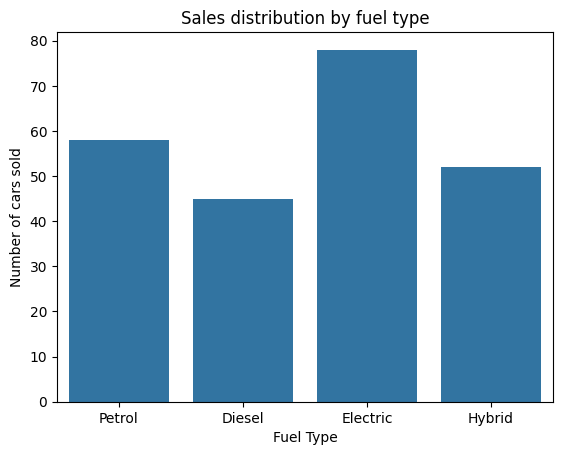

In [18]:
sns.countplot(x = df["Fuel Type"])
plt.title("Sales distribution by fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("Number of cars sold")
plt.show()

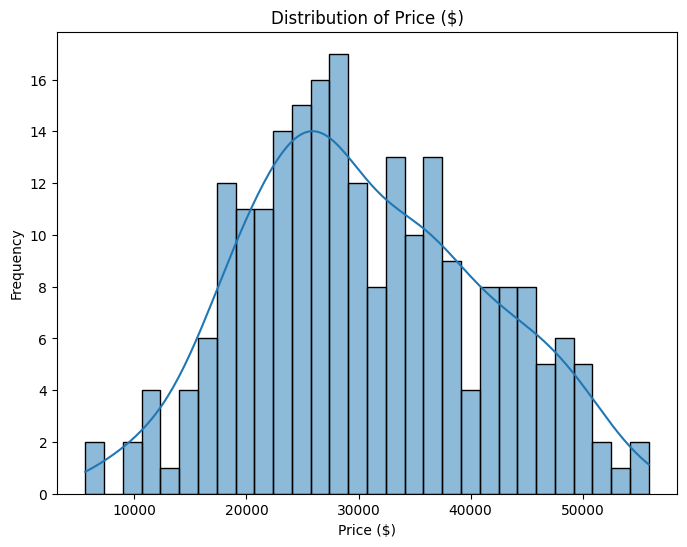

In [21]:
numeric_column = 'Price ($)'
plt.figure(figsize=(8,6))
sns.histplot(df[numeric_column],bins=30,kde=True)
plt.title(f'Distribution of {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.show()

In [25]:
df_cleaned = df.dropna(subset=['Price ($)', 'Mileage (km)'])
corr, p_value = stats.pearsonr(df_cleaned['Price ($)'], df_cleaned['Mileage (km)'])
print(f"Pearson correlation coefficient: {corr:.2f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.05
P-value: 0.482
